#**Import the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Loading the File**

In [ ]:
(xtrain, ytrain),(xtest, ytest) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtrain.ndim

3

In [ ]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
xtrain[1].shape

(28, 28)

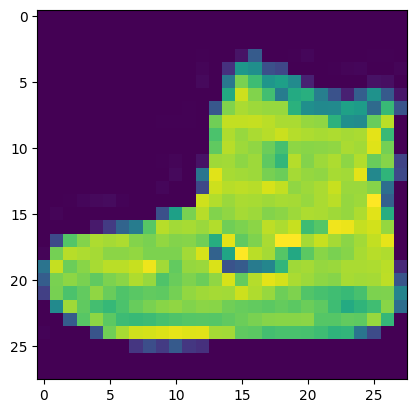

In [ ]:
# plooting the first image from the xtrain
plt.imshow(xtrain[0])

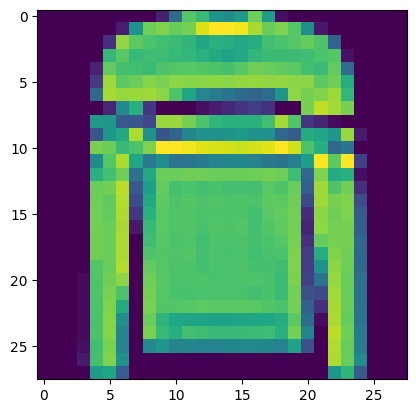

In [ ]:
plt.imshow(xtrain[5])

In [ ]:
# Scale the 'X' features
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
#### Model Building 

model = Sequential()

# adding Flatten for the input data with the shape of 28 by 28
# 28 rows and 28 columns 
model.add(Flatten(input_shape = (28,28)))

# Adding 1st Hidden layer with 128 neurons with activation function called 'relu
model.add(Dense(units = 128, activation = 'relu'))

# Adding 2nd Hidden Layer with 32 neurons and with activation function of 'relu
model.add(Dense(units = 32, activation = 'relu'))

# Adding output Layer 
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(xtrain,ytrain, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5398 - accuracy: 0.8117 - val_loss: 0.4013 - val_accuracy: 0.8610
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3878 - accuracy: 0.8599 - val_loss: 0.3771 - val_accuracy: 0.8666
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3469 - accuracy: 0.8739 - val_loss: 0.3642 - val_accuracy: 0.8702
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3231 - accuracy: 0.8810 - val_loss: 0.3333 - val_accuracy: 0.8777
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3016 - accuracy: 0.8875 - val_loss: 0.3463 - val_accuracy: 0.8781
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2889 - accuracy: 0.8916 - val_loss: 0.3343 - val_accuracy: 0.8806
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2747 - accuracy: 0.8973 - val_loss: 0.3259 - val_accuracy:

In [ ]:
model.history.history

{'loss': [0.5397785305976868,
  0.3877703845500946,
  0.34691596031188965,
  0.3230757415294647,
  0.3015810251235962,
  0.2889310121536255,
  0.27469515800476074,
  0.2639172375202179,
  0.2530919313430786,
  0.24544264376163483,
  0.2371203750371933,
  0.2292533963918686,
  0.22182351350784302,
  0.21544942259788513,
  0.20908060669898987,
  0.20333851873874664,
  0.19616514444351196,
  0.19245120882987976,
  0.18410064280033112,
  0.18192797899246216,
  0.17564642429351807,
  0.1705838292837143,
  0.16716066002845764,
  0.1614074558019638,
  0.1592361032962799],
 'accuracy': [0.8117291927337646,
  0.8598958253860474,
  0.8739374876022339,
  0.8810416460037231,
  0.887499988079071,
  0.8916458487510681,
  0.8973125219345093,
  0.9008749723434448,
  0.9053124785423279,
  0.9076041579246521,
  0.9116874933242798,
  0.913770854473114,
  0.9162499904632568,
  0.9187291860580444,
  0.9208750128746033,
  0.9225624799728394,
  0.9266666769981384,
  0.9276041388511658,
  0.929729163646698,
 

In [ ]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.539779,0.811729,0.401325,0.861000
1,0.387770,0.859896,0.377137,0.866583
2,0.346916,0.873937,0.364183,0.870250
3,0.323076,0.881042,0.333252,0.877750
4,0.301581,0.887500,0.346273,0.878083
5,0.288931,0.891646,0.334267,0.880583
6,0.274695,0.897313,0.325862,0.881333
7,0.263917,0.900875,0.349143,0.879500
8,0.253092,0.905312,0.329317,0.882917
9,0.245443,0.907604,0.347030,0.880917


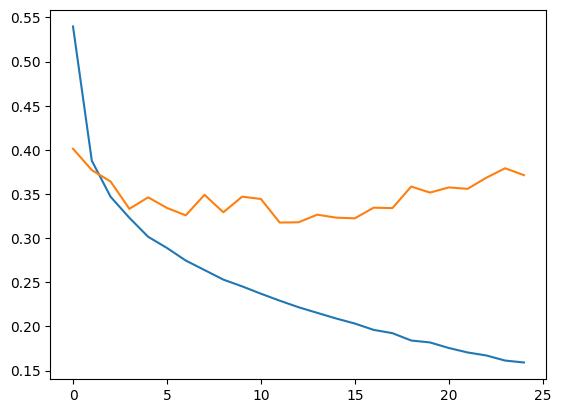

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

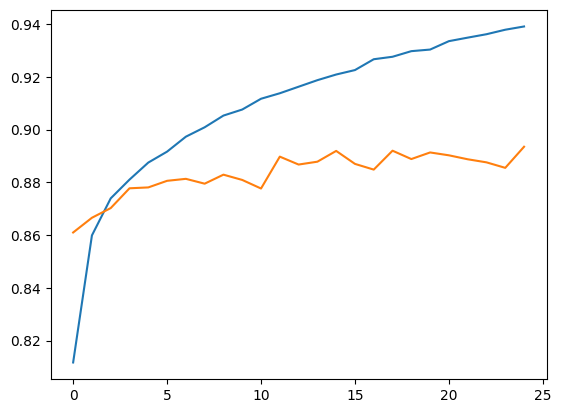

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
yprob = model.predict(xtest)
yprob
# the probabilityfor each image would be because the image hold 0 to 9

313/313 [==============================] - 1s 4ms/step


array([[5.9739646e-06, 9.0776155e-08, 1.0418838e-07, ..., 3.1115396e-03,
        2.1421345e-06, 9.9686658e-01],
       [4.4418261e-06, 2.0802497e-29, 9.9978709e-01, ..., 8.5245548e-26,
        5.1381476e-15, 2.5444031e-22],
       [5.3217633e-18, 9.9999994e-01, 3.2869661e-21, ..., 5.3920342e-27,
        9.0596932e-21, 2.4692541e-21],
       ...,
       [1.4404990e-16, 8.7817884e-22, 6.9923119e-14, ..., 1.7170681e-16,
        9.9999994e-01, 5.4965073e-15],
       [4.5986292e-12, 9.9999994e-01, 9.8653445e-15, ..., 9.6074030e-17,
        2.5231279e-14, 1.1103196e-16],
       [1.3218482e-09, 1.5410868e-14, 7.0234205e-09, ..., 2.6203052e-08,
        3.3480099e-08, 1.5272267e-09]], dtype=float32)

In [ ]:
yprob[0]

array([5.9739646e-06, 9.0776155e-08, 1.0418838e-07, 5.2817725e-08,
       9.7353627e-09, 5.1395045e-07, 1.2894427e-05, 3.1115396e-03,
       2.1421345e-06, 9.9686658e-01], dtype=float32)

In [ ]:
'''
0 T-shirt/top
1 Trouser 
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''

In [ ]:
# argmax will return the value of inex holding the maximum value
ypred = yprob.argmax(axis = 1)
ypred 

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
ypred[0]

9

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.80      0.80      0.80      1000
           3       0.88      0.89      0.88      1000
           4       0.77      0.84      0.80      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.67      0.69      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



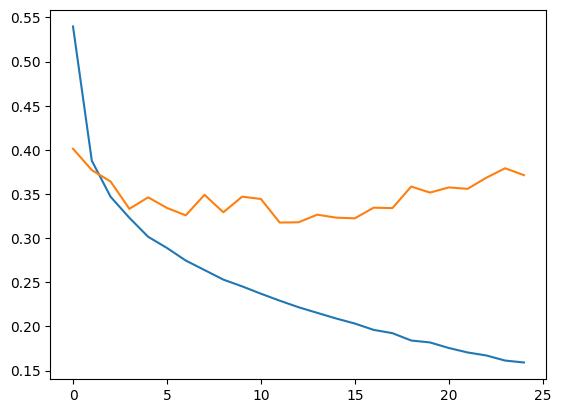

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])